In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A Lei de Planck

A Lei de Planck nos dá a radiância spectral, ou seja, o fluxo por unidade de comprimento de onda, por unidade de ângulo sólido, que é emitido espontâneamente por um corpo sólido, ou um gás sob alta pressão, em função unicamente de sua temperatura.

$$ B_{\lambda}(T) = \frac{2hc^2}{\lambda^5} \left[ \exp \left( \frac{hc}{\lambda k_B T} \right) -1\right]^{-1}$$
onde $h$ é a constante de Planck, $c$ é a velocidade da luz no vácuo, $\lambda$ é o comprimento de onda, $k_B$ é a constante de Boltzmann e $T$ é a temperatura.

In [2]:
def black_body(x, T):
    """
    Radiação de corpo negro em função do comprimento de onda e da temperatura.
    
    Parameters
    ----------
    x : float, ndarray
        Comprimento de onda em Angstrom.
    T : float
        Temperatura em Kelvin.
    
    Returns
    -------
    bb : same as x
        Radiância espectral em unidades de erg / (s sr cm^2 A).
    """
    h = 6.6260701e-27  # erg * s
    k = 1.380649e-16  # erg / K 
    c = 2.99792458e+10  # cm / s
    w = x * 1e-8  # convertendo de A para cm
    bb = 2 * h * (c ** 2) / (w ** 5) * (1.0 / (np.exp((h * c) / (w * k * T)) - 1))
    bb *= 1e-8  # convertendo de cm para A
    return bb

In [3]:
x = np.arange(3000, 9000, 100)  # angstroms
b = np.array([black_body(x, _ * 1e3) for _ in range(4, 7)])

labels = np.array([f'T = {i * 1000} K' for i in range(4, 7)])
colors = ['red', 'orange', 'blue']

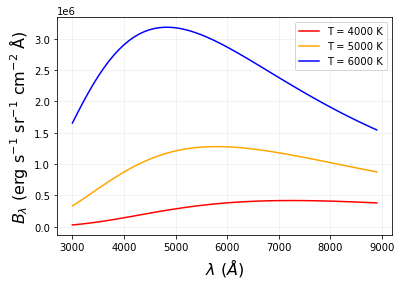

In [4]:
fig, ax = plt.subplots()
for y, lab, c in zip(b, labels, colors):
    ax.plot(x, y, label=lab, c=c)

ax.set_xlabel(r'$\lambda~(\AA)$', size=16)
ax.set_ylabel(r'$B_\lambda~({\rm erg~s^{-1}~sr^{-1}~cm^{-2}~\AA})$', size=16)

ax.grid(alpha=.2)
    
plt.legend()

O próximo gráfico é igual ao anterior, a menos da divisão de cada curva pelo seu valor quando $\lambda = 6000~A$.

Comprimento de onda de normalização: 7000 A.


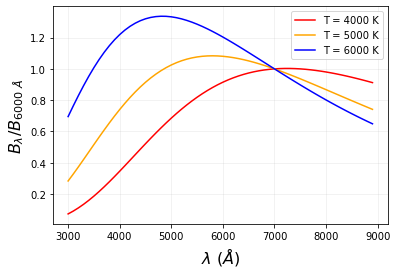

In [7]:
idx = 40
print(f'Comprimento de onda de normalização: {x[idx]:.0f} A.')

fig, ax = plt.subplots()
for y, lab, c in zip(b, labels, colors):
    ax.plot(x, y / y[idx], label=lab, c=c)
    
ax.set_xlabel(r'$\lambda~(\AA)$', size=16)
ax.set_ylabel(r'$B_\lambda / B_{6000~{\AA}}$', size=16)

ax.grid(alpha=.2)
    
plt.legend()

In [6]:
x[40]

7000